# Image denoising

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, layers, Model, Input

The aim of this project is to use Autoencoders architecture for image denoising : 

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

# MNIST dataset

In [4]:
# The MINST dataset is available on Keras
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()
print(images_train.shape)
print(images_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# Add a channel for the colors and normalize data
X_train = images_train.reshape((60000, 28, 28, 1)) / 255
X_test = images_test.reshape((10000, 28, 28, 1)) / 255

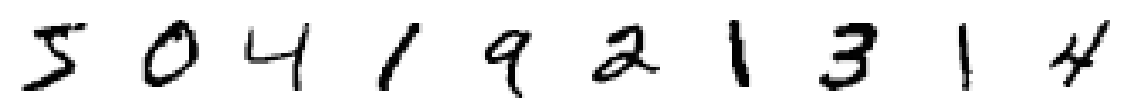

In [10]:
# Plot of few images
f, axs = plt.subplots(1, 10, figsize=(20, 4))
for i, ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys')
    
plt.show()

# Encoder

In [15]:
# Build the encoder
def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(layers.Conv2D(8, (2,2), input_shape=(28, 28, 1), activation='relu'))
    encoder.add(layers.MaxPooling2D(2))

    encoder.add(layers.Conv2D(16, (2, 2), activation='relu'))
    encoder.add(layers.MaxPooling2D(2))

    encoder.add(layers.Conv2D(32, (2, 2), activation='relu'))
    encoder.add(layers.MaxPooling2D(2))     

    encoder.add(layers.Flatten())
    encoder.add(layers.Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [16]:
# Test with latent_dimension = 2
latent_dimension = 2
encoder = build_encoder(latent_dimension)
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)        

# Decoder

In [17]:
# Build the decoder
def build_decoder(latent_dimension):
    decoder = Sequential()
    
    decoder.add(layers.Dense(7*7*8, activation='tanh', input_shape=(latent_dimension,)))
    decoder.add(layers.Reshape((7, 7, 8)))  # no batch axis here
    decoder.add(layers.Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))

    decoder.add(layers.Conv2DTranspose(1, (2, 2), strides=2, padding='same', activation='relu'))
    
    return decoder

In [18]:
# Test with latent_dimension = 2
latent_dimension = 2
decoder = build_decoder(latent_dimension)
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 392)               1176      
                                                                 
 reshape (Reshape)           (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        264       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        33        
 ranspose)                                                       
                                                                 
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


# Auto-encoder

In [24]:
# Build the autoencoder
def build_autoencoder(encoder, decoder):
    
    inp = Input((28, 28,1))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    
    return autoencoder

In [25]:
# Check of the summary and the nb of paramaters
autoencoder = build_autoencoder(encoder, decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential_1 (Sequential)   (None, 2)                 2906      
                                                                 
 sequential_2 (Sequential)   (None, 28, 28, 1)         1473      
                                                                 
Total params: 4,379
Trainable params: 4,379
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile autoencoder
# mse is the most appropriate loss function for pixel by pixel error minimization
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')

In [27]:
# Training autoencoder
compile_autoencoder(autoencoder)
autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0590
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0531
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0524
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0521
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0518
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0515
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0512
Epoch 8/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0509
Epoch 9/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0507
Epoch 10/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0506
Epoch 11/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0505
Epoch 12/20
1875/1875 [==============================] - 17s 9ms/step - lo

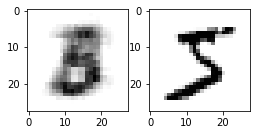

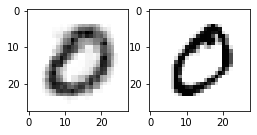

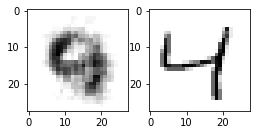

In [28]:
# Prediction and image display
prediction = autoencoder.predict(X_train, verbose=0, batch_size=100)

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow(prediction[i].reshape(28,28), cmap = 'Greys')
    ax2.imshow(X_train[i].reshape(28,28), cmap = 'Greys')
    plt.show()

# Image denoising

In [29]:
# Add random noise
noise_factor = 0.5

X_train_noisy = X_train + noise_factor * np.random.normal(0., 1., size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(0., 1., size=X_test.shape)

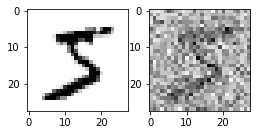

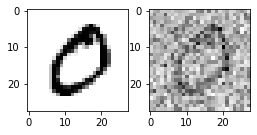

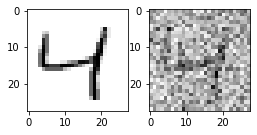

In [30]:
# Display images with noise
for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow(X_train[i].reshape(28,28), cmap='Greys')
    ax2.imshow(X_train_noisy[i].reshape(28,28), cmap='Greys')
    plt.show()

In [31]:
# Autoencode the noisy dataset
latent_dimension = 2

# encoder & decoder
encoder = build_encoder(2)
decoder = build_decoder(2)

# autoencoder
autoencoder = build_autoencoder(encoder, decoder)
compile_autoencoder(autoencoder)

# Training
history_denoising = autoencoder.fit(X_train_noisy, X_train,
                                    epochs = 20, 
                                    batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0624
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0560
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0552
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0546
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0543
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0541
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0539
Epoch 8/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0538
Epoch 9/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0536
Epoch 10/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0534
Epoch 11/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0533
Epoch 12/20
1875/1875 [==============================] - 17s 9ms/step - lo

313/313 [==============================] - 2s 4ms/step


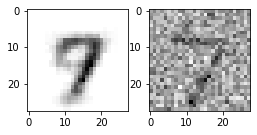

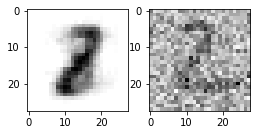

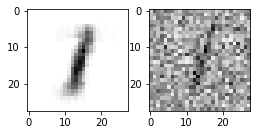

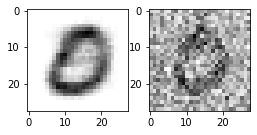

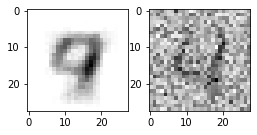

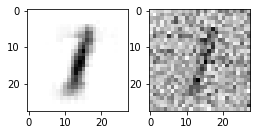

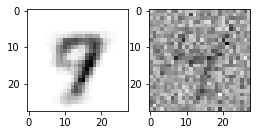

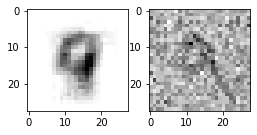

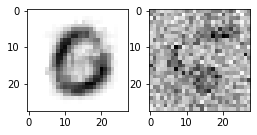

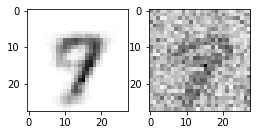

In [32]:
# Predict and display prediction
prediction = autoencoder.predict(X_test_noisy, verbose=1)

for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow(prediction[i].reshape(28,28), cmap='Greys')
    ax2.imshow(X_test_noisy[i].reshape(28,28), cmap='Greys')
    plt.show()

In [33]:
# Test with latent dimension = 8

# Autoencode the noisy dataset
latent_dimension = 8

# encoder & decoder
encoder = build_encoder(latent_dimension)
decoder = build_decoder(latent_dimension)

# autoencoder
autoencoder = build_autoencoder(encoder, decoder)
compile_autoencoder(autoencoder)

# Training
history_denoising = autoencoder.fit(X_train_noisy, X_train,
                                    epochs = 20, 
                                    batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0687
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0518
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0383
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0362
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0354
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0349
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0345
Epoch 8/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0342
Epoch 9/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0340
Epoch 10/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0338
Epoch 11/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0336
Epoch 12/20
1875/1875 [==============================] - 17s 9ms/step - lo

313/313 [==============================] - 1s 4ms/step


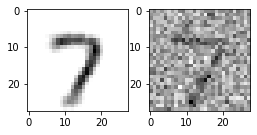

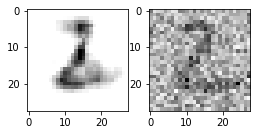

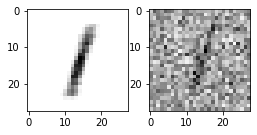

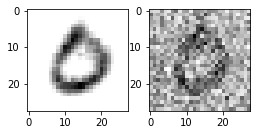

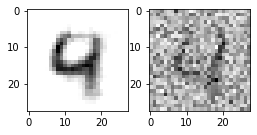

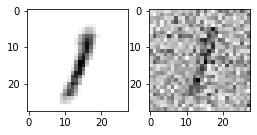

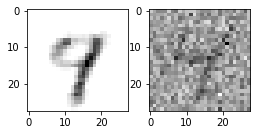

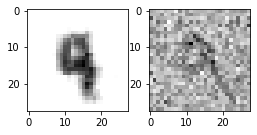

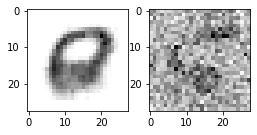

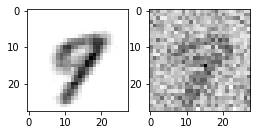

In [34]:
# Predict and display prediction with latent dimension = 8
prediction = autoencoder.predict(X_test_noisy, verbose=1)

for i in range(10):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow(prediction[i].reshape(28,28), cmap='Greys')
    ax2.imshow(X_test_noisy[i].reshape(28,28), cmap='Greys')
    plt.show()